In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [3]:
# Load the data
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [4]:
y_train = train['label']
X_train = train.drop('label', axis=1)
X_test = test

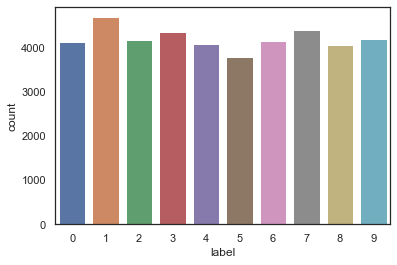

In [5]:
# y_train.value_counts()
sns.countplot(y_train)

In [6]:
X_train.isna().any().describe()  # no missing values

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
X_test.isna().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [8]:
# normalize
X_test = X_test/255.0
X_train = X_train/255.0

In [9]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

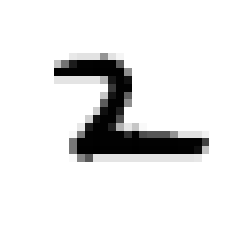

Label:  2


In [10]:
idx = 44

plt.imshow(X_train[idx][:,:,0], cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print('Label: ', y_train[idx])

In [11]:
# Encode label
y_train = to_categorical(y_train, num_classes=10)
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
# Split the train and the validation set
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size = 0.05, random_state=2)

## CNN

In -> [ [Conv2D->relu]\*2 -> MaxPool2D -> Dropout]\*2 -> Flatten -> Dense -> Dropout -> Out

In [13]:
model = Sequential()

model.add(Conv2D(kernel_size=(5,5), padding='Same', activation='relu', filters=32, input_shape=(28,28,1)))
model.add(Conv2D(kernel_size=(5,5), padding='Same', activation='relu', filters=32))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(kernel_size=(3,3), padding='Same', activation='relu', filters=32, input_shape=(28,28,1)))
model.add(Conv2D(kernel_size=(3,3), padding='Same', activation='relu', filters=32))
model.add(MaxPool2D(pool_size=(2,2), strides= (2,2)))
model.add(Dropout(rate=0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

W0820 16:05:24.773056  6044 deprecation_wrapper.py:119] From c:\users\ricardo\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 16:05:24.787051  6044 deprecation_wrapper.py:119] From c:\users\ricardo\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 16:05:24.790050  6044 deprecation_wrapper.py:119] From c:\users\ricardo\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 16:05:24.820042  6044 deprecation_wrapper.py:119] From c:\users\ricardo\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is depre

In [14]:
rmsprop = RMSprop()
model.compile(loss="categorical_crossentropy", optimizer=rmsprop, metrics=['accuracy'])

W0820 16:05:24.998986  6044 deprecation_wrapper.py:119] From c:\users\ricardo\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 16:05:25.008981  6044 deprecation_wrapper.py:119] From c:\users\ricardo\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [15]:
history = model.fit(x=X_train, y=y_train, batch_size=16, epochs=5, verbose=1, validation_data=(X_cv, y_cv))

W0820 16:05:25.112963  6044 deprecation.py:323] From c:\users\ricardo\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 39900 samples, validate on 2100 samples
Epoch 1/5
39900/39900 [==============================] - 87s 2ms/step - loss: 0.1869 - acc: 0.9431 - val_loss: 0.0675 - val_acc: 0.9790
Epoch 2/5
39900/39900 [==============================] - 88s 2ms/step - loss: 0.0865 - acc: 0.9760 - val_loss: 0.0596 - val_acc: 0.9833
Epoch 3/5
39900/39900 [==============================] - 86s 2ms/step - loss: 0.0821 - acc: 0.9792 - val_loss: 0.0493 - val_acc: 0.9857
Epoch 4/5
39900/39900 [==============================] - 86s 2ms/step - loss: 0.0849 - acc: 0.9784 - val_loss: 0.0505 - val_acc: 0.9843
Epoch 5/5
39900/39900 [==============================] - 86s 2ms/step - loss: 0.0919 - acc: 0.9787 - val_loss: 0.0689 - val_acc: 0.9857


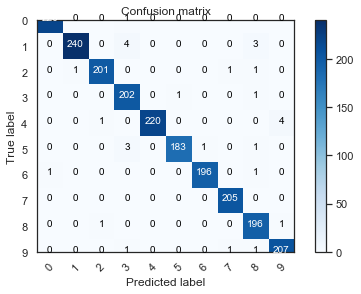

In [16]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
y_pred = model.predict(X_cv)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_cv,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [17]:
print('Accuracy: ', history.history['acc'][-1])

Accuracy:  0.9787468671679198


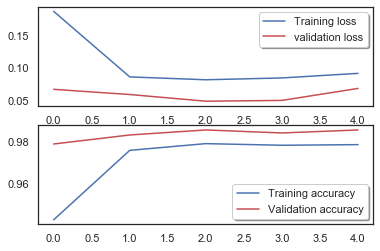

In [18]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)